In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os

In [2]:
sns.set_style('darkgrid', {'legend.frameon':True})
PATH = "D:/Aurelien/Documents/Aurelien/University/Master 1 (2021-2022)/MA1 - Q2/INFO-H410 - Techniques of Artificial Intelligence - BERSINI Hugues/Projets/AI_Othello/Results/"
os.chdir(PATH)

In [3]:
folder = 'Depth/'
d = pd.DataFrame()
for file in os.listdir(folder):
    df = pd.read_csv(folder + file)
    df.columns = ['Round', *df.columns[1:]]
    zero = pd.DataFrame([[-1, 0, '', '', 2, 2]], columns=["Round", "Time", "Color", "Move", "Black", "White"])
    df = pd.concat([zero, df])
    df["Round"] = df["Round"] + 1
    
    df["Increasing"] = df["Color"]
    if file[1] != '+':            # if str 'h' in first part, than 'White'-'Black' (p2-p1)                      
        df["Player"] = "First"
        df["Score"] = df["White"] - df["Black"]
        df["Increasing"] = df["Increasing"].replace([" X ", " O "], [False, True])
    else:
        df["Player"] = "Second"
        df["Score"] = df["Black"] - df["White"]
        df["Increasing"] = df["Increasing"].replace([" X ", " O "], [True, False])
        
    df["Depth"] = int(file[0])
    d = pd.concat([d, df], axis=0, ignore_index=True)
d = d[["Round", "Time", "Increasing", "Player", "Score","Depth"]]
d

,Round,Time,Increasing,Player,Score,Depth
0,0,0.000,,Second,0,1
1,1,0.001,True,Second,3,1
2,2,0.002,False,Second,0,1
3,3,0.001,True,Second,3,1
4,4,0.002,False,Second,0,1
...,...,...,...,...,...,...
849,56,0.009,True,First,20,7
850,57,0.006,False,First,17,7
851,58,0.001,True,First,26,7
852,59,0.000,False,First,15,7


In [5]:
d.to_csv(('Graphs/' + 'depth.csv'))

# 4-6

1
Average time with pruning : 0.004
Average time without pruning : 0.002


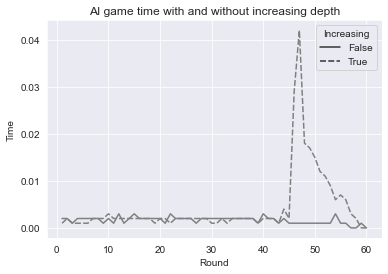

2
Average time with pruning : 0.017
Average time without pruning : 0.009


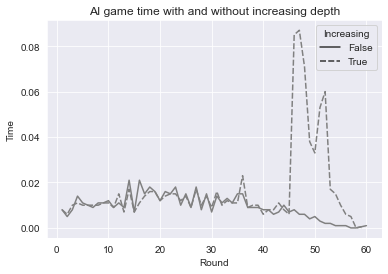

3
Average time with pruning : 0.073
Average time without pruning : 0.048


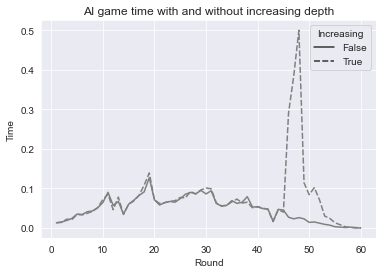

4
Average time with pruning : 0.281
Average time without pruning : 0.211


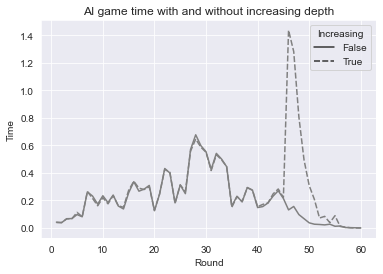

5
Average time with pruning : 1.055
Average time without pruning : 0.911


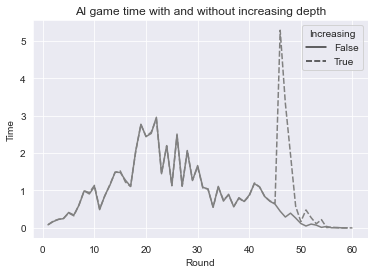

6
Average time with pruning : 6.143
Average time without pruning : 5.940


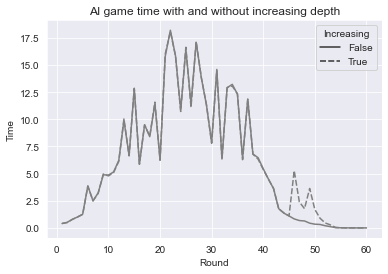

7
Average time with pruning : 11.825
Average time without pruning : 10.881


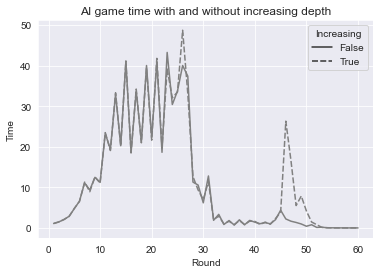

In [64]:
for i in range(1,8):
    print(i)
    a = d[d["Depth"]==i]
    a = a[["Time","Round","Increasing"]]
    print(f"Average time with pruning : {a[a['Increasing']==True]['Time'].mean():0.3f}")
    print(f"Average time without pruning : {a[a['Increasing']==False]['Time'].mean():0.3f}")
    
    plt.title("AI game time with and without increasing depth")
    plt.ylabel('Time')
    plt.xlabel('Round')

    sns.lineplot(data=a, x="Round", y="Time", style="Increasing", style_order=[False,True], color='gray')#, palette=('red','green'))
    plt.savefig('./Graphs/' + 'depth_' + str(i) + '_time' + '.png')
    plt.show()

In [11]:
h = d[d["Increasing"]==True]
nh = d[d["Increasing"]==False]

h_time = pd.DataFrame(columns=["Depth", "Without", "With"])
for i in range(1,8):
    tnh = f"{nh.loc[nh['Depth']==i, 'Time'].mean():0.3f}"
    th = f"{h.loc[h['Depth']==i, 'Time'].mean():0.3f}"
    h_time.loc[len(h_time)] = [i, tnh, th]
#h_time.to_csv('Graphs/' + 'time_heuristic.csv')
h_time

,Depth,Without,With
0,1,0.002,0.004
1,2,0.009,0.017
2,3,0.048,0.073
3,4,0.211,0.281
4,5,0.911,1.055
5,6,5.940,6.143
6,7,10.881,11.825


# Quality

<AxesSubplot:title={'center':'Pawns difference of AI with and without increasing depth'}, xlabel='Round', ylabel='Advantage'>

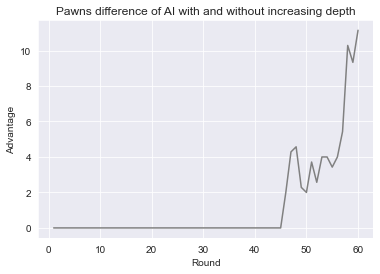

In [57]:
df = d.groupby(["Round","Increasing"]).mean()[["Score","Time"]]

l = []
for i in range(1,61):
    l.append(df.loc[(i, True)]["Score"] + df.loc[(i, False)]["Score"])

plt.title("Pawns difference of AI with and without increasing depth")
plt.xlabel('Round')
plt.ylabel('Advantage')

sns.lineplot(x=range(1,61), y=l, color="gray")

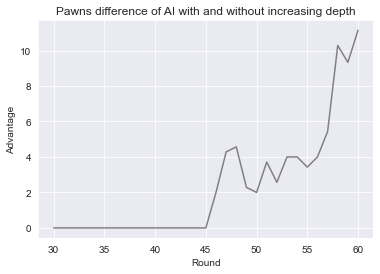

In [56]:
plt.title("Pawns difference of AI with and without increasing depth")
plt.xlabel('Round')
plt.ylabel('Advantage')
#plt.savefig('./Graphs/' + 'depth_score' + '.png')

sns.lineplot(x=range(30,61), y=l[29:], color="gray")
plt.savefig('./Graphs/' + 'depth_score' + '.png')

# Autres

1


C:\Users\Aurelien\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


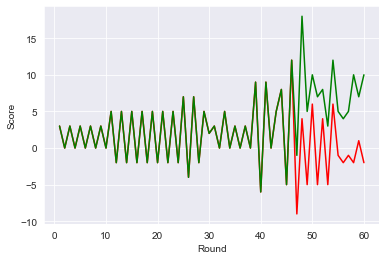

2


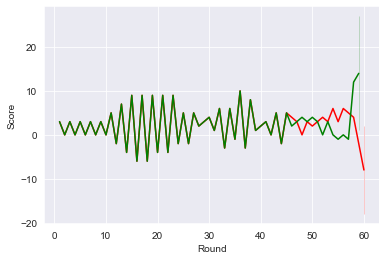

3


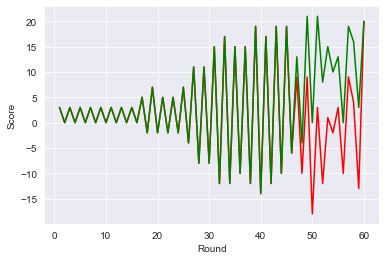

4


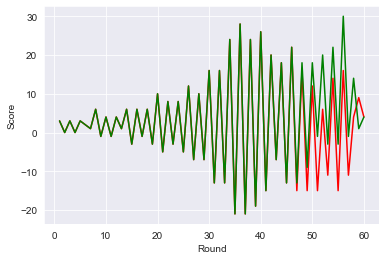

5


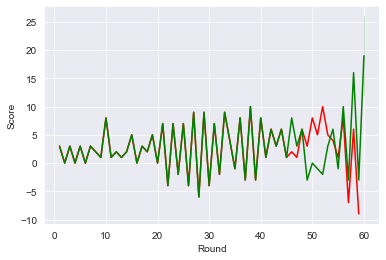

6


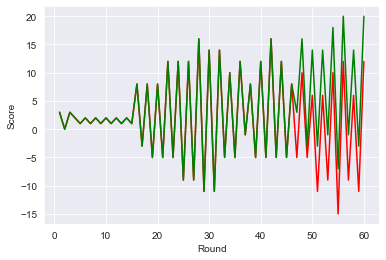

7


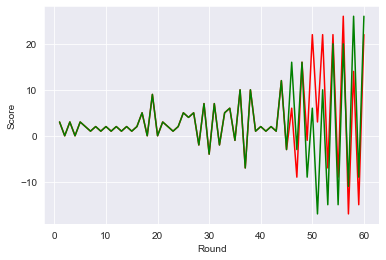

In [9]:
b = d[d["Round"]<40]
a = d[d["Round"]>=40]
di = d[d["Increasing"]==True]
dni = d[d["Increasing"]==False]
dni["Score"] = -dni["Score"]

my_color = np.where(d["Score"]>=0.0, 'Greens', 'Reds')

for i in range(1,8):
    print(i)
    sns.lineplot(data=dni[dni["Depth"]==i], x="Round", y="Score", color='red')
    sns.lineplot(data=di[di["Depth"]==i], x="Round", y="Score", color='green')
    plt.show()

<AxesSubplot:title={'center':'Pawns difference of AI by increasing depth by 2 at round 45'}, xlabel='Round', ylabel='Advantage'>

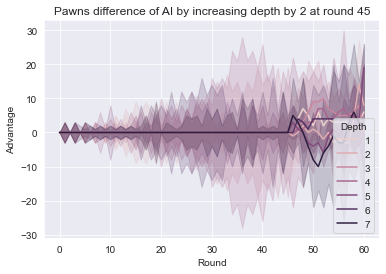

In [10]:
plt.xlabel("Round")
plt.ylabel("Advantage")
plt.title("Pawns difference of AI by increasing depth by 2 at round 45")
sns.lineplot(data=d, x="Round", y="Score", hue="Depth")#, palette="Greens")
#plt.savefig('./Graphs/' + 'heuristic_lineplot' + '.png')